In [2]:
import pandas as pd
import numpy as np

##시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [4]:
# 1. 이름순으로 정렬하시요
sr.sort_index()

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64

In [5]:
sr['홍길동']

90

In [8]:
# 2. 키보드로 입력받아 검색된 이름의 점수를 구하시요
# 이름:홍길동
# 70
try:
    name=input('이름입력:')
    print( sr[name] )
#     sr.loc[name]
except Exception as err:
    print("이름이 없습니다")

이름입력:ㅁㅁㅁ
이름이 없습니다


In [ ]:
3. 데이터를 다음과 같이 출력하시요
(0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
---------------------
이름 국어 학점
---------------------
홍길동 70 C
...
김철수3 25 F

In [11]:
pd.cut( sr, [-1,59,69,79,89,100], labels=['F','D','C','B','A'] )

홍길동     A
이순신     A
임꺽정     F
정난정     D
이이      C
이황      B
정도전     C
김철수1    B
김철수2    F
김철수3    F
Name: 국어점수, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [9]:
def get_grade(v):
    if v >=90:
        return 'A'
    elif (v>= 80) & (v<90): # 80<=v<90
        return 'B'
    elif (v>= 70) & (v<80):
        return 'C'
    elif (v>= 60) & (v<70):
        return 'D'
    else:
        return 'F'
rSr = sr.apply( get_grade )
rSr

홍길동     A
이순신     A
임꺽정     F
정난정     D
이이      C
이황      B
정도전     C
김철수1    B
김철수2    F
김철수3    F
Name: 국어점수, dtype: object

In [10]:
print("==================================")
print("이름    국어  학점")
print("==================================")
for n, k in sr.items():
    print(n, k, rSr[n], sep='\t')

이름    국어  학점
홍길동	90	A
이순신	90	A
임꺽정	55	F
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	F
김철수3	25	F


In [ ]:
4. 국어 점수 50점이하는 가산점20를 부여하고
국어 점수 50점초과는 가산점10를 부여하시요

In [12]:
sr.apply(lambda v: (v +20) if v>=50 else (v+10) )

홍길동     110
이순신     110
임꺽정      75
정난정      80
이이       96
이황      100
정도전      96
김철수1    108
김철수2     40
김철수3     35
Name: 국어점수, dtype: int64

In [13]:
#5. 국어점수 10%, 50%, 90%에 해당하는 값을 구하시요
sr.quantile(q=[0.1, 0.5, 0.9]).values

array([29.5, 76. , 90. ])

In [14]:
#6. 각 국어점수에 대한 갯수 를 구하시요
sr.value_counts()

90    2
76    2
30    1
60    1
25    1
88    1
55    1
80    1
Name: 국어점수, dtype: int64

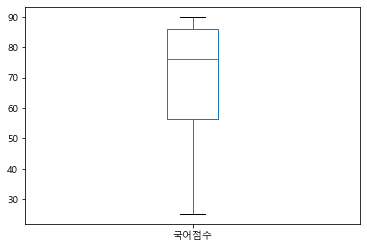

In [15]:
# 7. 국어점수에 대한 boxplot을 그리시요.
sr.plot(kind='box')
plt.show()

In [16]:
list( range(0,101,10) )

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [31]:
result = pd.cut( sr, range(0,101,10)).value_counts().sort_index()
result

(0, 10]      0
(10, 20]     0
(20, 30]     2
(30, 40]     0
(40, 50]     0
(50, 60]     2
(60, 70]     0
(70, 80]     3
(80, 90]     3
(90, 100]    0
Name: 국어점수, dtype: int64

In [43]:
c = result.cumsum()
c

(0, 10]       0
(10, 20]      0
(20, 30]      2
(30, 40]      2
(40, 50]      2
(50, 60]      4
(60, 70]      4
(70, 80]      7
(80, 90]     10
(90, 100]    10
Name: 국어점수, dtype: int64

In [34]:
r = result/result.sum()
r

(0, 10]      0.0
(10, 20]     0.0
(20, 30]     0.2
(30, 40]     0.0
(40, 50]     0.0
(50, 60]     0.2
(60, 70]     0.0
(70, 80]     0.3
(80, 90]     0.3
(90, 100]    0.0
Name: 국어점수, dtype: float64

In [71]:
for n in result.index:
    print( f'{n.left}~{n.right}' )

0~ 10
10~ 20
20~ 30
30~ 40
40~ 50
50~ 60
60~ 70
70~ 80
80~ 90
90~ 100


In [79]:
for i,k,l,m in zip(  result.index,result.values, c.values, r.values   ):
    print( f'{i.left:2}~{i.right:3}{(i.left+i.right)/2:5}{k:5}{l:5}{m:5}' )

 0~ 10  5.0    0    0  0.0
10~ 20 15.0    0    0  0.0
20~ 30 25.0    2    2  0.2
30~ 40 35.0    0    2  0.0
40~ 50 45.0    0    2  0.0
50~ 60 55.0    2    4  0.2
60~ 70 65.0    0    4  0.0
70~ 80 75.0    3    7  0.3
80~ 90 85.0    3   10  0.3
90~100 95.0    0   10  0.0


In [54]:
# 8. 과일의 비율을 파이차트로 그리시요
fruit=pd.Series( [10,20,30,50],index=['사과','딸기','포도','수박'] ,name='과일')

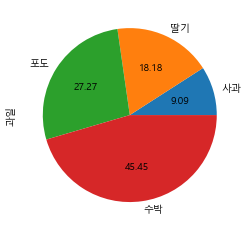

In [55]:
fruit.plot(kind='pie',autopct='%.2f')
plt.show()